In [14]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

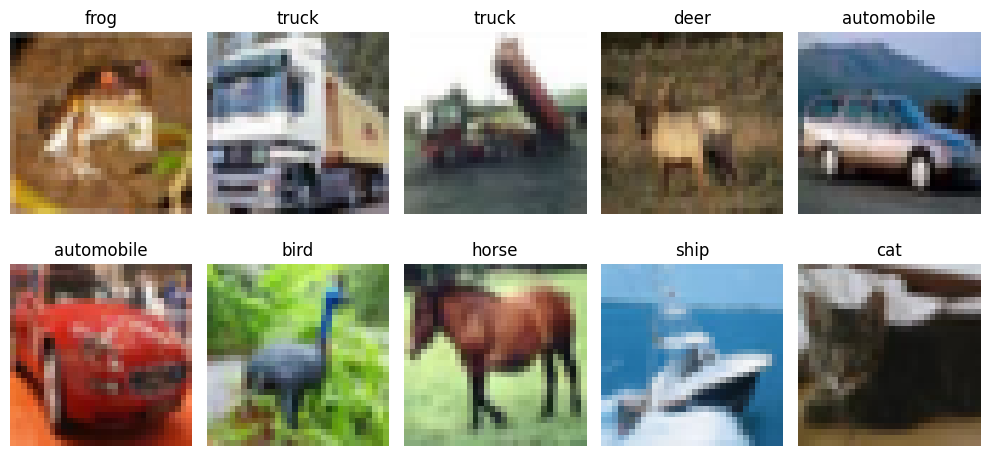

In [15]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Visualize some examples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
y_train.shape

(50000, 1)

## 1. Load and Visualize Dataset

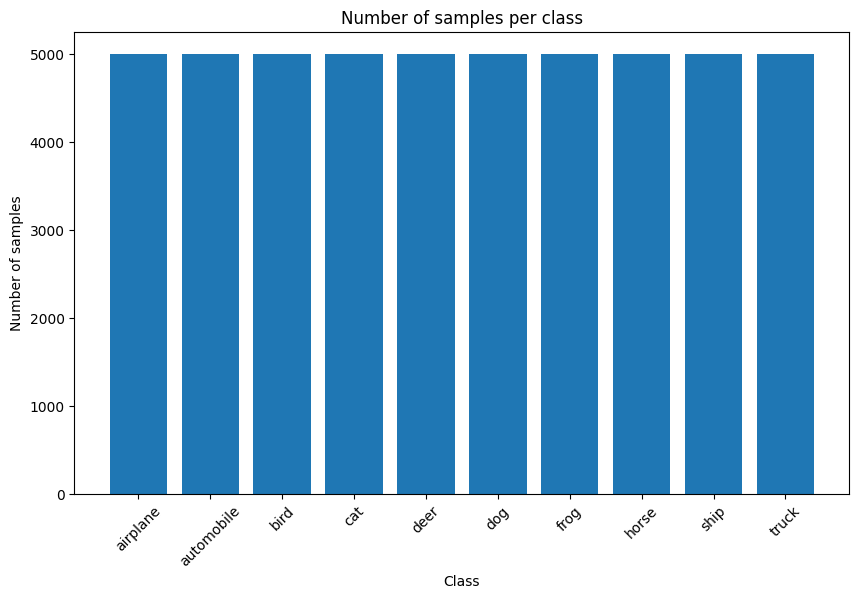

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [16]:
from collections import Counter

labels = y_train.ravel()

# Count the number of samples per class
class_counts = Counter(labels)

# Sort by class index
classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=45)
plt.show()

# Optional: print counts for reference
for cls, count in zip(class_names, counts):
    print(f"{cls}: {count}")

### 2. Data Preprocessing
Before training, we need to prepare our data to fit the model:
1. **Reshape** not needed
2. **Normalize** pixel values to the [0, 1] range to speed up training.
3. **Encode** the labels using one-hot encoding for categorical classification.

In [17]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# normalize pixel values to 0 - 1
# reshaping is not necessary for CIFAR-10 as it is already in the correct shape
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split train into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(
  #  X_train, y_train, test_size=0.2, random_state=42)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)


 3. Build CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    Flatten(), # flattening the 3D output to 1D

    Dense(128, activation='relu'),
    Dropout(0.5), # regularization to prevent overfitting by 50% dropout
    Dense(10, activation='softmax')])  # 10 neurons = 10 classes


model.summary()

#increasing the number of filters but decreasing the imagise size (by MaxPooling) gives more depth and smaller spatial size (height&width)
#32-64-128 (doubling)
#32-64-64 (stabilizing)
#64-64-128-256(increasing)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### 4.Compile & Train

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #optimizer -  updates weights, loss - minimizers errors, metrics - tracks performance
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.7407 - loss: 0.7447 - val_accuracy: 0.7058 - val_loss: 0.8615
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7517 - loss: 0.7092 - val_accuracy: 0.7060 - val_loss: 0.9097
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7595 - loss: 0.6795 - val_accuracy: 0.7027 - val_loss: 0.9138
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.7774 - loss: 0.6333 - val_accuracy: 0.7053 - val_loss: 0.9087
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 47ms/step - accuracy: 0.7879 - loss: 0.6040 - val_accuracy: 0.7267 - val_loss: 0.8847
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7913 - loss: 0.5800 - val_accuracy: 0.7288 - val_loss: 0.8662
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.8058 - loss: 0.5409 - val_accuracy: 0.7164 - val_loss: 0.9169
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 72ms/step - accuracy: 0.8132 -

### 5. Evaluation

In [ ]:
y_true.shape

(10000, 10)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
y_pred_labels = y_pred

In [ ]:
y_pred.shape

(10000,)

In [ ]:
import numpy as np

# Convert one-hot encoded y_true to class labels
y_true_labels = np.argmax(y_true, axis=1)
y_true = y_test  # original integer labels

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_true_labels, y_pred_labels)
prec = precision_score(y_true_labels, y_pred_labels, average='weighted')
rec = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7199
Precision: 0.7246
Recall: 0.7199
F1-score: 0.7207


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true_labels, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.70      0.80      0.75      1000
  automobile       0.84      0.85      0.84      1000
        bird       0.59      0.61      0.60      1000
         cat       0.52      0.56      0.54      1000
        deer       0.67      0.70      0.68      1000
         dog       0.66      0.59      0.62      1000
        frog       0.75      0.83      0.79      1000
       horse       0.83      0.73      0.78      1000
        ship       0.85      0.79      0.82      1000
       truck       0.84      0.75      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [ ]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


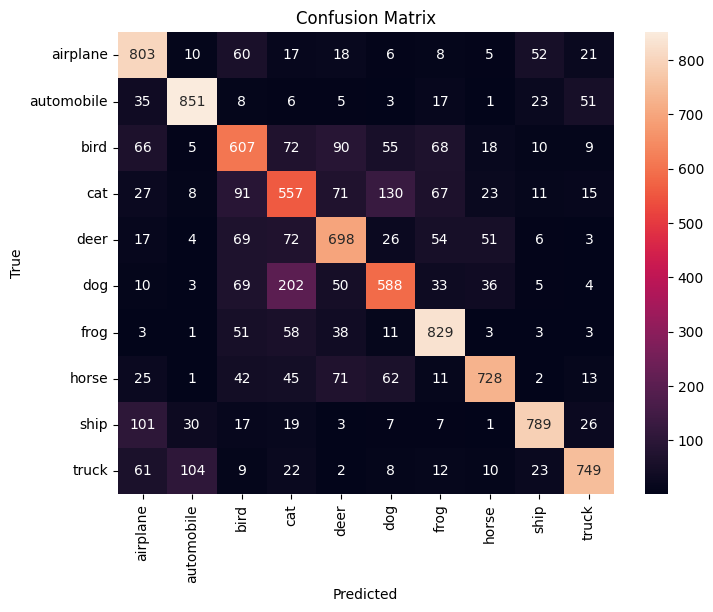

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict & confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_true_labels, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

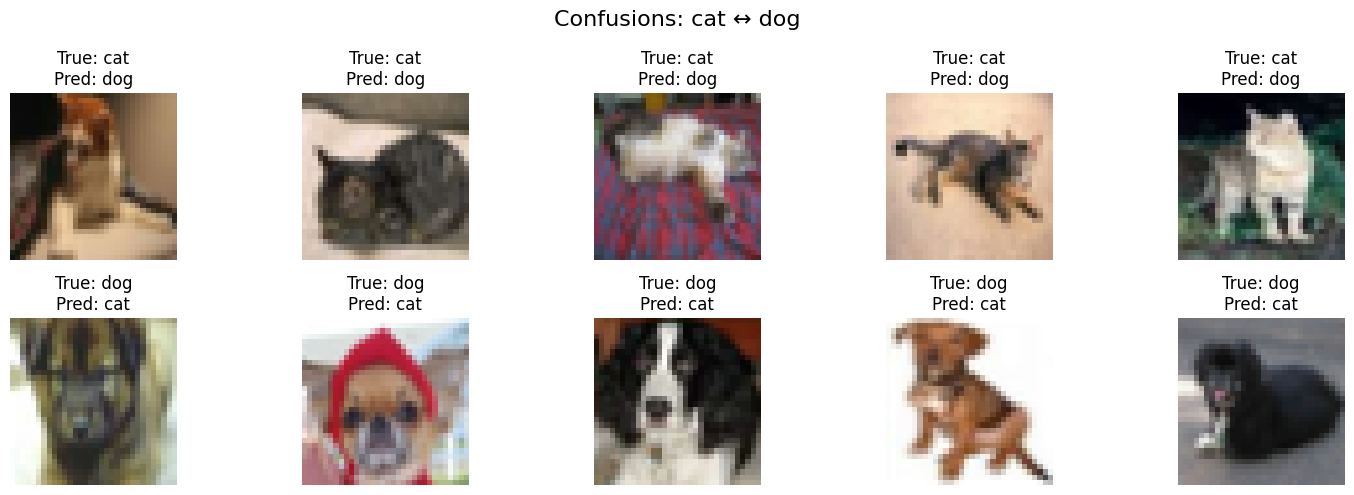

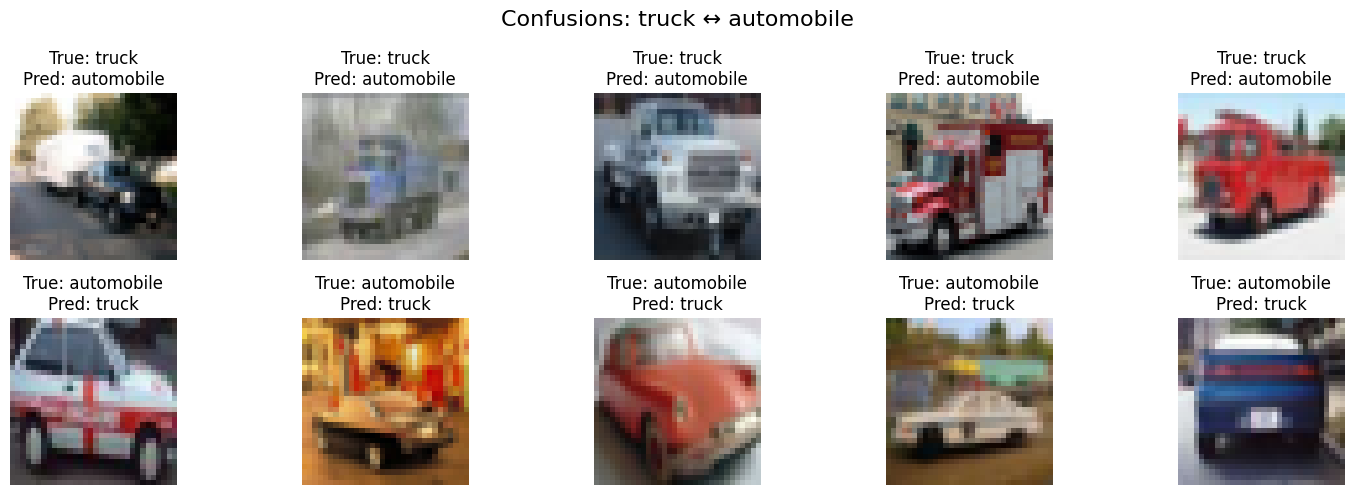

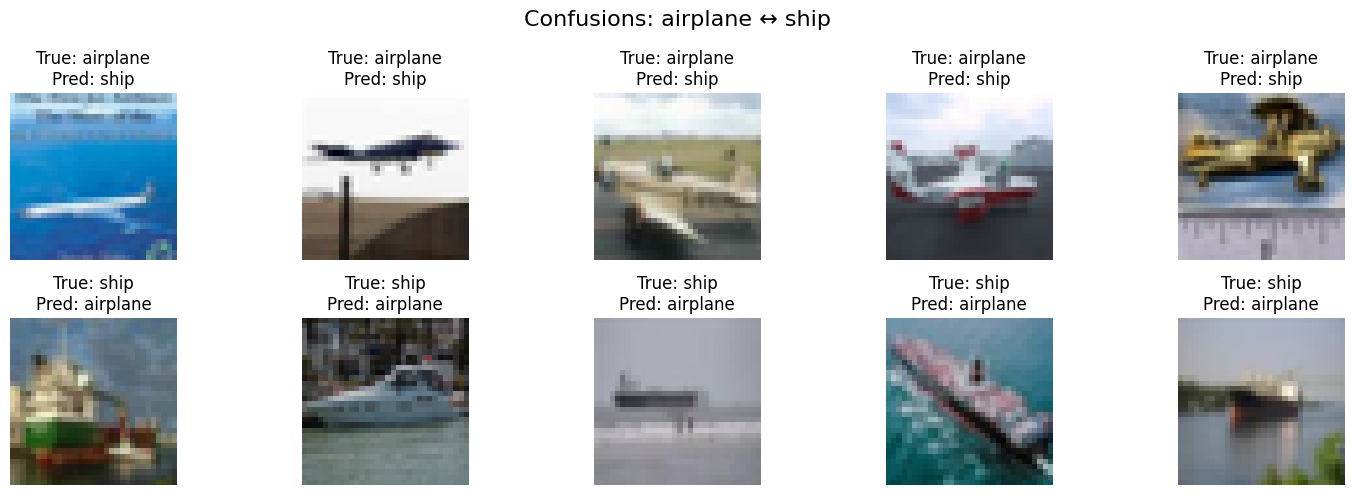

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_pred and y_true are numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Convert X_test to numpy if it's a TensorFlow tensor
X_test_np = X_test.numpy() if hasattr(X_test, 'numpy') else X_test

# CIFAR-10 class names
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Update confusing pairs based on classification report observations
# These are just example pairs; adjust based on your actual analysis
confusing_pairs = [
    (3, 5),  # cat vs dog
    (9, 1),  # truck vs automobile
    (0, 8),  # airplane vs ship
]

# Function to visualize misclassifications between two classes
def show_confusion_examples(y_true, y_pred, X, class1, class2, n=5):
    idx_confused_1 = np.where((y_true == class1) & (y_pred == class2))[0]
    idx_confused_2 = np.where((y_true == class2) & (y_pred == class1))[0]

    fig, axes = plt.subplots(2, n, figsize=(15, 5))
    fig.suptitle(f"Confusions: {class_names[class1]} ↔ {class_names[class2]}", fontsize=16)

    for i in range(n):
        if i < len(idx_confused_1):
            ax = axes[0, i]
            ax.imshow(X[idx_confused_1[i]].reshape(32, 32, 3))
            ax.set_title(f"True: {class_names[class1]}\nPred: {class_names[class2]}")
            ax.axis('off')
        else:
            axes[0, i].axis('off')

        if i < len(idx_confused_2):
            ax = axes[1, i]
            ax.imshow(X[idx_confused_2[i]].reshape(32, 32, 3))
            ax.set_title(f"True: {class_names[class2]}\nPred: {class_names[class1]}")
            ax.axis('off')
        else:
            axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the selected confusion pairs
for class1, class2 in confusing_pairs:
    show_confusion_examples(y_true_labels, y_pred, X_test_np, class1, class2)


## Improving the Model: More Layers and Data Augmentation

In [20]:
# Define deeper CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_more_layers = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_more_layers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)   # usually float32
print(y_train.dtype)   # int or float
print(X_train.min(), X_train.max())  # image pixel ranges, usually 0-255 or 0-1


(50000, 32, 32, 3)
(50000, 10)
float32
float64
0.0 1.0


In [22]:
model_more_layers.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(X_train.shape)
print(X_train.dtype )

(50000, 32, 32, 3)
float32


In [23]:
history_more_layers = model_more_layers.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test)
)
# Train on original data

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.2936 - loss: 1.8862 - val_accuracy: 0.5354 - val_loss: 1.2669
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5282 - loss: 1.3090 - val_accuracy: 0.6225 - val_loss: 1.0850
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6129 - loss: 1.1087 - val_accuracy: 0.6636 - val_loss: 0.9719
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6604 - loss: 0.9652 - val_accuracy: 0.7017 - val_loss: 0.8746
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6935 - loss: 0.8760 - val_accuracy: 0.7120 - val_loss: 0.8281
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7167 - loss: 0.8101 - val_accuracy: 0.7301 - val_loss: 0.7737
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7339 - loss: 0.7543 - val_accuracy: 0.7315 - val_loss: 0.7639
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7490 - loss: 0.7222 - val_accuracy: 

In [24]:
# Evaluate
loss, accuracy = model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy with more layers: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7718 - loss: 0.7038
Test accuracy with more layers: 0.7673


**Hyperparameters tuning**

*Early stoping*

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [26]:
model_2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Dropout(0.25),  # Dropout after first pooling

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),  #  Dropout after second pooling

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),   # Dropout before output layer
    Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
# Setup EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=3,           # stop if no improvement after 3 epochs
    restore_best_weights=True
)

In [28]:
# Train the model with early stopping
history = model_2.fit(
    X_train, y_train,
    epochs=60,             # large max epochs, training will stop early if needed
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2964 - loss: 1.8923 - val_accuracy: 0.5191 - val_loss: 1.3529
Epoch 2/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4854 - loss: 1.4348 - val_accuracy: 0.5863 - val_loss: 1.1811
Epoch 3/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5363 - loss: 1.3021 - val_accuracy: 0.6203 - val_loss: 1.0868
Epoch 4/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5691 - loss: 1.2165 - val_accuracy: 0.6339 - val_loss: 1.0476
Epoch 5/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5909 - loss: 1.1654 - val_accuracy: 0.6598 - val_loss: 0.9983
Epoch 6/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6062 - loss: 1.1222 - val_accuracy: 0.6625 - val_loss: 0.9910
Epoch 7/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6200 - loss: 1.0792 - val_accuracy: 0.6491 - val_loss: 1.0145
Epoch 8/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6330 - loss: 1.0416 - val_accuracy: 0

In [29]:
# Evaluate the model
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Test accuracy with early stopping: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7482 - loss: 0.7276
Test accuracy with early stopping: 0.7467


In [30]:
# Data Augmentation
#applying random transformation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#helps the model see slightly different versions of the same images on each epoch, which improves generalization and prevents overfitting

datagen = ImageDataGenerator(     #will apply random transformations to images only during training
    rotation_range=15,
    width_shift_range=0.1,     #randomly shifts the image horizontally by up to 10% of width
    height_shift_range=0.1,    #randomly shifts the image vertically by up to 10% of height
    horizontal_flip=True     #randomly flips the image left <-> right
)
datagen.fit(X_train)   #it's needed for featurewise normalization - here optional

In [31]:
#training
history_aug = model_more_layers.fit(
    X_train, y_train,
    epochs=60,             # large max epochs, training will stop early if needed
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8283 - loss: 0.4855 - val_accuracy: 0.7759 - val_loss: 0.7128
Epoch 2/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8293 - loss: 0.4758 - val_accuracy: 0.7809 - val_loss: 0.6894
Epoch 3/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8357 - loss: 0.4656 - val_accuracy: 0.7808 - val_loss: 0.6865
Epoch 4/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8394 - loss: 0.4529 - val_accuracy: 0.7672 - val_loss: 0.7579
Epoch 5/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8405 - loss: 0.4508 - val_accuracy: 0.7756 - val_loss: 0.6985
Epoch 6/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8426 - loss: 0.4440 - val_accuracy: 0.7773 - val_loss: 0.7142


In [32]:
# Evaluate
loss_aug, accuracy_aug = model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy with data augmentation: {accuracy_aug:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7884 - loss: 0.6657
Test accuracy with data augmentation: 0.7807
